In [210]:
import torch as tc
from torchvision import models

In [211]:
resnet101=models.resnet101(pretrained=True) # instantiating a resnet101

In [212]:
from torchvision import transforms as tns

In [213]:
# creating a pre-process for the images to fit the resnet101 requirements. Mean and std have been computed previously
preprocess=tns.Compose([
    tns.Resize(256),
    tns.CenterCrop(224),
    tns.ToTensor(),
    tns.Normalize(
        mean=[0.485,0.456,0.406],
        std=[0.229,0.224,0.225])
])

In [214]:
from PIL import Image

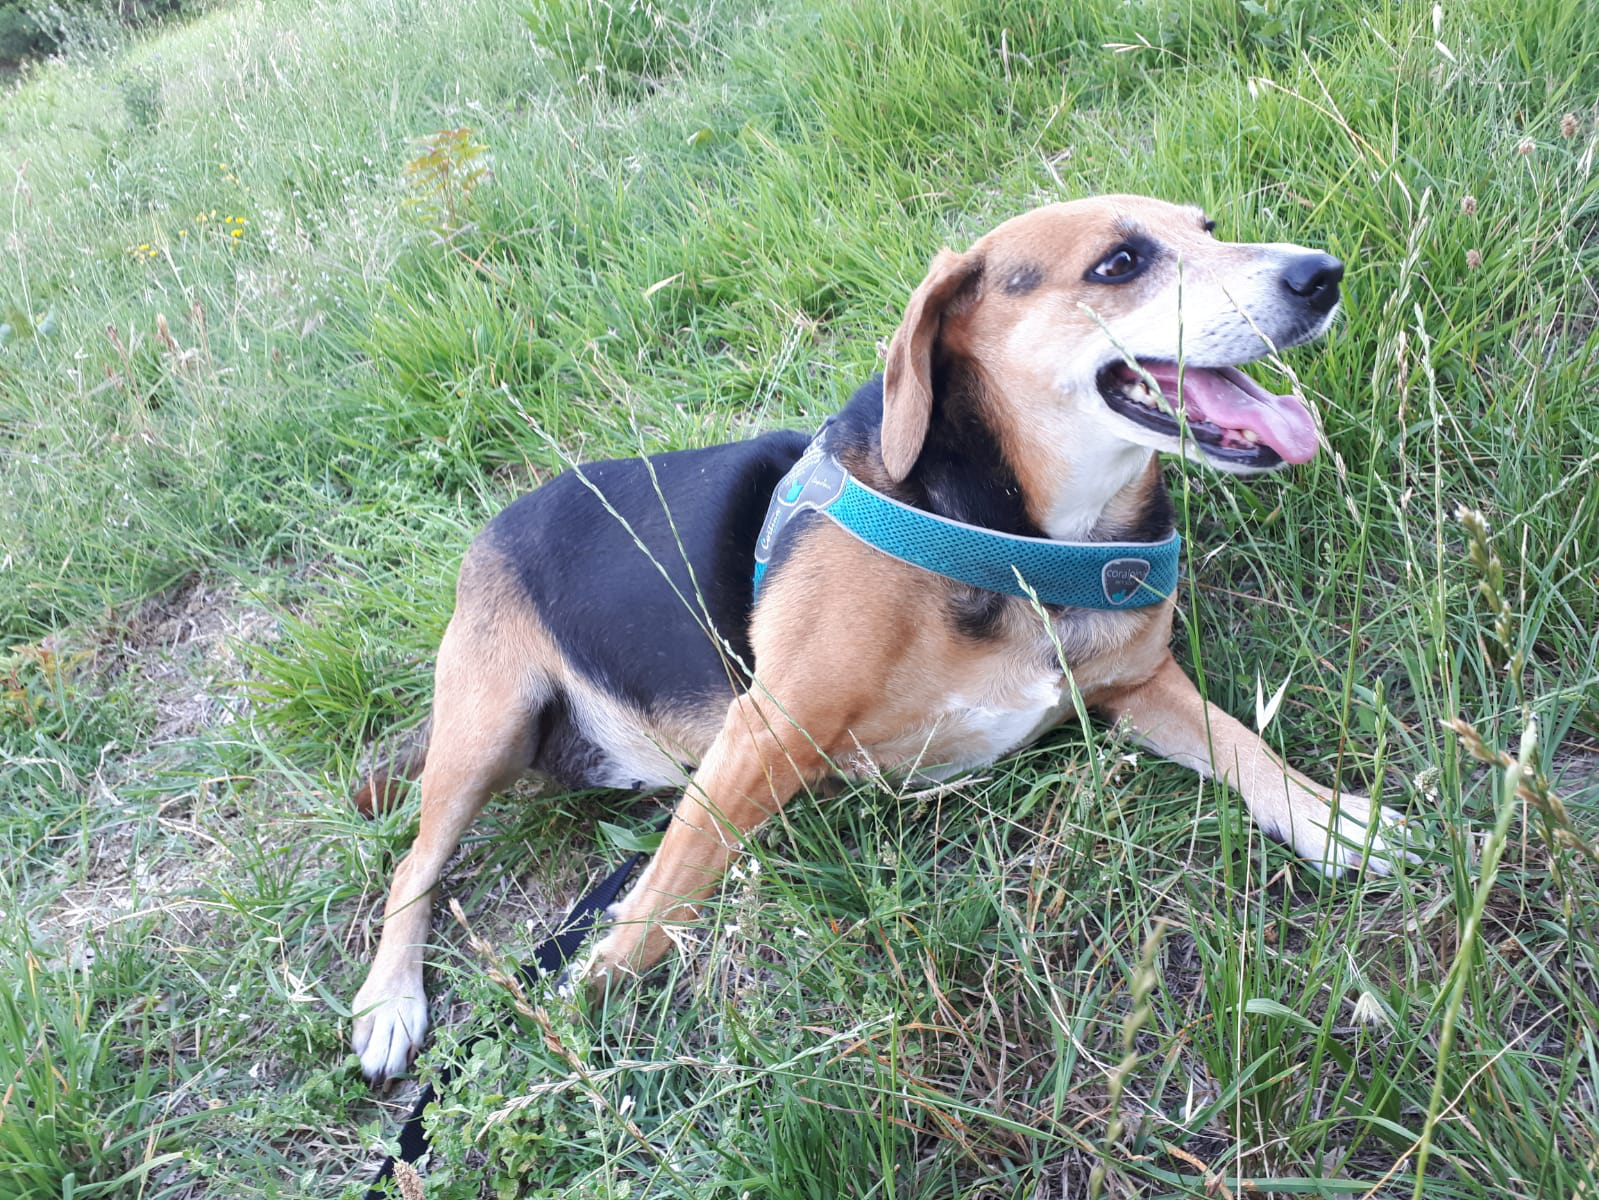

In [215]:
# loading a sample
name='lucy.jpeg'
img=Image.open("..\\Data\\"+name)
img

In [218]:
# pre-processing the img and reshaping it to a batch's shape (single image batch in this case)
img_t=preprocess(img)
batch_t = tc.unsqueeze(img_t,0)
batch_t.requires_grad=True
batch_t.shape

torch.Size([1, 3, 224, 224])

In [219]:
# setting resnet101 in eval mode
resnet101.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [226]:
# reading and saving labels from a file
with open('..\\Data\\imagenet_classes.txt') as f:
    labels=[line.strip() for line in f.readlines()]

In [221]:
# computing prediction on the batch_t in input
out=resnet101(batch_t)
out.shape,out.requires_grad,batch_t.requires_grad

(torch.Size([1, 1000]), True, True)

In [222]:
# getting the argmax of the out tensor, and saving the pair (label, label_index)
lab_index=tc.max(out,1)[1].item()
lab=labels[lab_index], lab_index
lab

('beagle', 162)

In [223]:
grad_out_wrt_in=tc.autograd.grad(out[0,lab_index],batch_t)[0] # extract the only element from the tuple
grad_out_wrt_in.shape

torch.Size([1, 3, 224, 224])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 1800x1200 with 0 Axes>

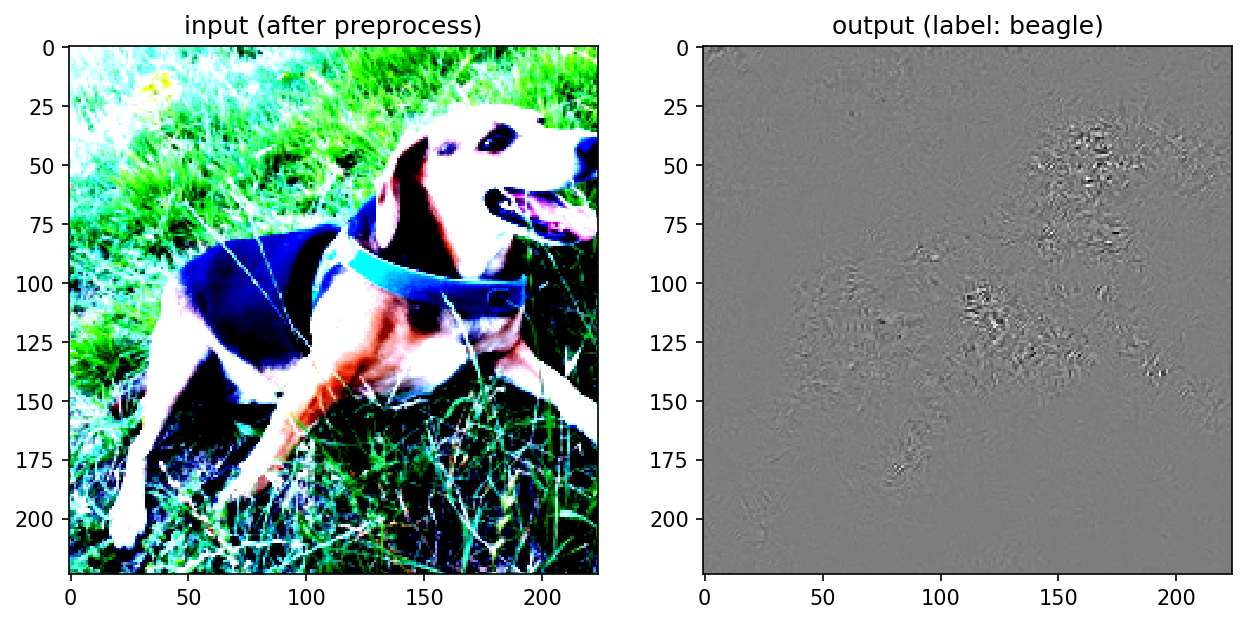

In [207]:
# plotting 
from matplotlib import pyplot as plt
inp,outp=batch_t.squeeze(0).detach().permute(1,2,0).numpy(),grad_out_wrt_in.squeeze(0).detach().permute(1,2,0)
name='result_'+name
fig=plt.figure(dpi=300)
plt.figure(dpi=150,figsize=(10, 4.8))  
ax1 = plt.subplot(1, 2, 1)   
plt.title('input (after preprocess)')
plt.imshow(inp,cmap='gray')
plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)
plt.imshow(outp.sum(dim=2), cmap='gray')
plt.title('output (label: '+lab[0]+')')   
#plt.savefig('..\\Data\\'+name) # uncomment to save figures
plt.show()